## welcome to ImageJam-Desktop experiments notebook!
* picture yourself in a boat on a river, with tangerine trees and marmalade skies
* or picture yourself in an image array on a computer, with binary trees and multithreaded skies

In [8]:
# install dependencies
!pip3 install -r requirements.txt

     ---------------------------------------- 7.6/7.6 MB 3.1 MB/s eta 0:00:00
     -------------------------------------- 163.0/163.0 kB 1.6 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 55.4/55.4 kB 2.8 MB/s eta 0:00:00
     ---------------------------------------- 98.3/98.3 kB 2.8 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from PIL import Image
import numpy as np

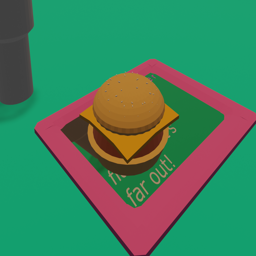

In [10]:
# let's get cooking by loading an image to work with
fp = 'test_img.png'
img = Image.open(fp)
# set the image size to 256x256
img = img.resize((256, 256))
# display the image
img

In [11]:
# converting to array
img_array = np.asarray(img)
# display the array
img_array

array([[[ 64,  64,  64, 255],
        [ 64,  64,  64, 255],
        [ 64,  64,  64, 255],
        ...,
        [ 27, 160, 112, 255],
        [ 27, 160, 112, 255],
        [ 27, 160, 112, 255]],

       [[ 64,  64,  64, 255],
        [ 64,  64,  64, 255],
        [ 64,  64,  64, 255],
        ...,
        [ 27, 160, 112, 255],
        [ 27, 160, 112, 255],
        [ 27, 160, 112, 255]],

       [[ 64,  64,  64, 255],
        [ 64,  64,  64, 255],
        [ 64,  64,  64, 255],
        ...,
        [ 27, 160, 112, 255],
        [ 27, 160, 112, 255],
        [ 27, 160, 112, 255]],

       ...,

       [[ 19, 159, 110, 255],
        [ 19, 159, 110, 255],
        [ 19, 159, 110, 255],
        ...,
        [ 19, 159, 110, 255],
        [ 19, 159, 109, 255],
        [ 19, 159, 110, 255]],

       [[ 19, 159, 110, 255],
        [ 19, 159, 110, 255],
        [ 19, 159, 110, 255],
        ...,
        [ 19, 159, 110, 255],
        [ 19, 159, 110, 255],
        [ 19, 159, 110, 255]],

       [[ 19

## plotting the array in matplotlib

Matplotlib is building the font cache; this may take a moment.


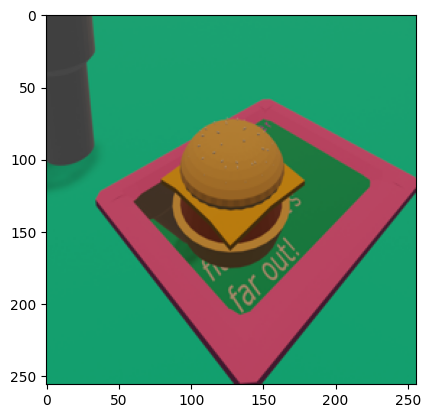

In [12]:
from matplotlib import pyplot as plt
# create the plot
plt.imshow(img_array)

## mirrored images

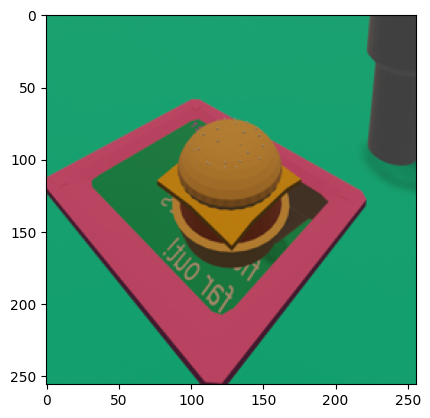

In [17]:
# transpose the array to mirror the image
# mir_img_array = np.transpose(img_array, (1, 0, 2))  # (1, 0, 2) is the transpose order, (0, 1, 2) is the original order
# create a mirror image along the y-axis
mir_img_array = np.flip(img_array, axis=1)

plt.imshow(mir_img_array)

## symmetry mirror
* todo stop the image from growing when combining

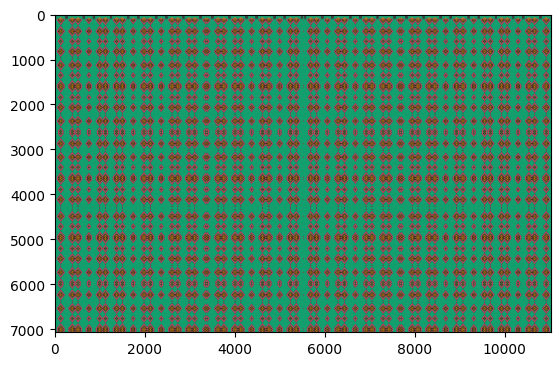

In [63]:
def symetric_mirror(img_array):
    """Create a symetric mirror image of an image array"""
    # get the image dimensions
    img_h, img_w, _ = img_array.shape
    # get half the image relative to the width
    half_img = img_array[:, :int(img_w / 2), :]
    # transpose the image
    half_img = np.transpose(half_img, (1, 0, 2))
    # create a mirror image along the y-axis
    half_img_b = np.flip(half_img, axis=1)
    # combine the two images
    sym_mirror_img_a = np.concatenate((half_img, half_img_b), axis=1)
    # mirror the image along the x-axis
    sym_mirror_img_b = np.flip(sym_mirror_img_a, axis=0)
    # half the size of each image
    sym_mirror_img_a = sym_mirror_img_a[:int(img_w / 2), :, :]
    sym_mirror_img_b = sym_mirror_img_b[:int(img_h / 2), :, :]
    # combine the two images
    sym_mirror_img = np.concatenate((sym_mirror_img_a, sym_mirror_img_b), axis=0)
    # how can we combine the images while keeping the original aspect ratio?
    # A: we can use the original image dimensions to determine the new image dimensions
    # we can then use the new image dimensions to create a new image array
    # resize the image to the original dimensions
    # sym_mirror_img = Image.fromarray(sym_mirror_img)
    # sym_mirror_img = sym_mirror_img.resize((img_w, img_h))
    # convert the image back to an array
    # sym_mirror_img = np.asarray(sym_mirror_img)
     
    return sym_mirror_img


def kaleidoscope(img_array, n):
    """create a kaleidoscope image for n steps"""
    orginal_shape = img_array.shape
    steps = 0
    while steps < n:
        img_array = symetric_mirror(img_array)
        steps += 1
    # resize the image to the original dimensions
    # img_array = Image.fromarray(img_array)
    # img_array = img_array.resize((orginal_shape[1], orginal_shape[0]))
    # convert the image back to an array
    # img_array = np.asarray(img_array)
    return img_array


kaleido_8 = kaleidoscope(img_array, 8)
plt.imshow(kaleido_8)

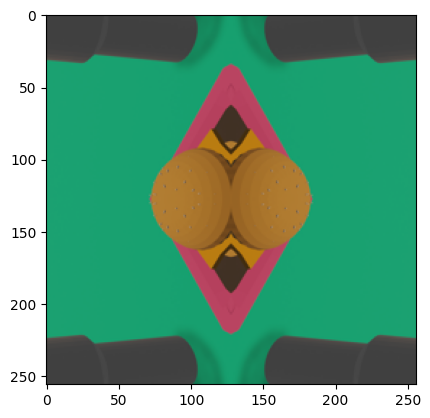

In [28]:
img_w, img_h = img.size
half_w = int(img_w / 2)
half_h = int(img_h / 2)
# get half the image relative to the width
half_img = img_array[:, :half_w, :]
# transpose the image
half_img = np.transpose(half_img, (1, 0, 2))
# create a mirror image along the y-axis
half_img_b = np.flip(half_img, axis=1)
# combine the two images
sym_mirror_img = np.concatenate((half_img[:, :half_w, :], half_img_b[:, half_w:, :]), axis=1)
# mirror the image along the x-axis
sym_mirror_img_b = np.flip(sym_mirror_img, axis=0)
# combine the two images
kilido_img = np.concatenate((sym_mirror_img, sym_mirror_img_b), axis=0)
# display the image
plt.imshow(kilido_img)

In [8]:
# converting to array
img_array = np.asarray(img)

NameError: name 'np' is not defined